<a href="https://colab.research.google.com/github/ujjwalch8077/MCA-1-SL/blob/main/ImageProcessingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset

In [2]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2022-08-21 04:55:28--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2022-08-21 04:55:29--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee02c9915adce87cd51871461b.dl.dropboxusercontent.com/cd/0/inline/BrbjXawzO-QtozkmkuH42ohVI_lmRl95sh5dGvPvfz1YYdcqgs0kdmYBTrt61_i5lxzZIebZIQO3dY7goN-3XdwmMAVpodYoNm2sfO1ogALh8YkCbefSbXg-NsreJafM4gcOVOPPHoQZR4iI9vSY7kH-wJhCZr4Gcwc_fmXzB_xuhw/file# [following]
--2022-08-21 04:55:29--  https://ucee02c9915adce87cd51871461b.dl.dropboxusercontent.com/cd/0/inline/BrbjXawzO-QtozkmkuH42ohVI_lmRl95sh5dGvPvfz1YYdcqgs0kdmY

Unzip the Dataset

In [3]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Visualise the data

Populating the interactive namespace from numpy and matplotlib


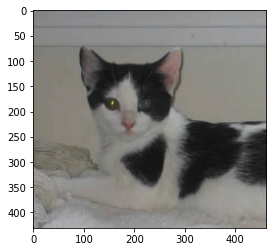

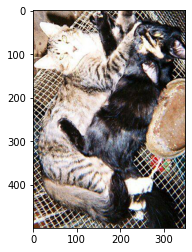

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/training_set/training_set/cats/cat.1040.jpg')
imgplot = plt.imshow(img)
plt.show()
img1 = mpimg.imread('/content/training_set/training_set/cats/cat.1048.jpg')
imgplot = plt.imshow(img1)
plt.show()

Import Libraries

In [5]:
# !pip install tensorflow
# !pip install matplotlib
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
print(tensorflow.__version__)

2.8.2


Designing the Model

Initialize Parameters

In [7]:
img_width, img_height = 150, 150
train_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'
no_training_sample = 100
no_validation_sample = 100
epochs = 20
batch_size = 20

Check the shape of image

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)


Generate iamges to train our model

1. Rescale
2. Shear_range
3. Zoom_range
4. Horizontal_flip

In [9]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2 , horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_width,img_height), batch_size=batch_size, class_mode = 'binary',classes =['cats','dogs'])

validation_generator = test_datagen.flow_from_directory(test_data_dir, target_size =(img_width, img_height), batch_size=batch_size,class_mode = 'binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Check generated data by ImageDataGenerator

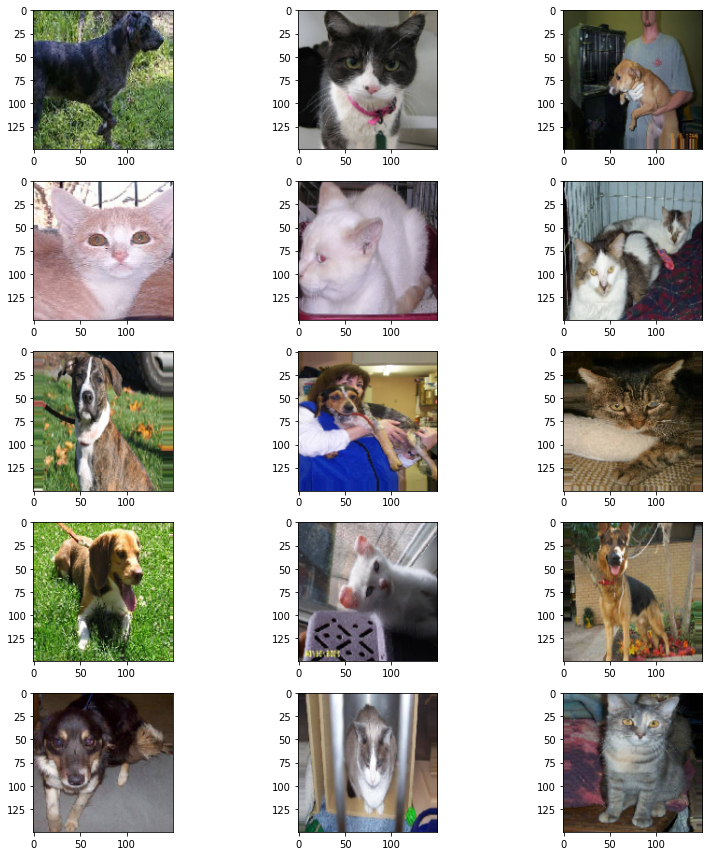

In [10]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch,y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

Building the CNN model

In [11]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

Compile the model

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

Fit the model

In [13]:
training = model.fit_generator(train_generator,steps_per_epoch=no_training_sample,epochs=epochs,validation_data=validation_generator,validation_steps=no_validation_sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
100/100 [==============================] - 33s 206ms/step - loss: 1.9907 - accuracy: 0.5540 - val_loss: 0.6253 - val_accuracy: 0.6770
Epoch 2/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6681 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6490
Epoch 3/20
100/100 [==============================] - 21s 215ms/step - loss: 0.6364 - accuracy: 0.6620 - val_loss: 1.4428 - val_accuracy: 0.5380
Epoch 4/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6444 - accuracy: 0.6770 - val_loss: 0.6094 - val_accuracy: 0.6775
Epoch 5/20
100/100 [==============================] - 25s 251ms/step - loss: 0.6222 - accuracy: 0.6775 - val_loss: 0.6107 - val_accuracy: 0.6790
Epoch 6/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6137 - accuracy: 0.6775 - val_loss: 0.6351 - val_accuracy: 0.6925
Epoch 7/20
100/100 [==============================] - 21s 214ms/step - loss: 0.5991 - accuracy: 0.6900 - val_loss: 0.6121 - val_ac

Check the accuracy graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


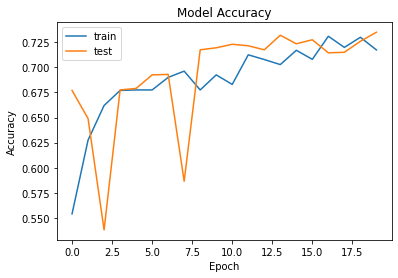

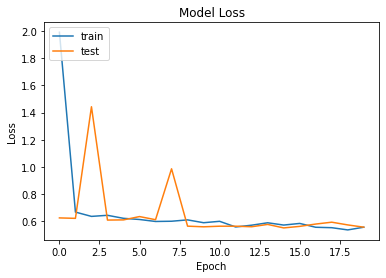

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Predict the  output

[[1.]]
Prediction:  Dog


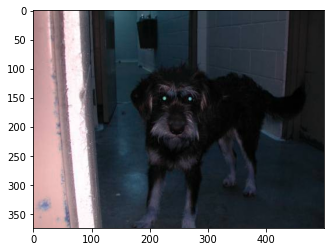

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
img_path='/content/test_set/test_set/dogs/dog.4159(1).jpg'
img_pred=image.load_img(img_path,target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction='Dog'
else:
  prediction='Cat'
print("Prediction: ",prediction)

img = cv2.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

